### Work in progress

##### Advanced Path Selection 
- Incorporating Path Selection based on Population and Distance

100
200
Population at node A: 0
Population at node B: 0
Population at node C: 0
Population at node D: 0
Population at node E: 0
Population at node F: 0
Population at node G: 0


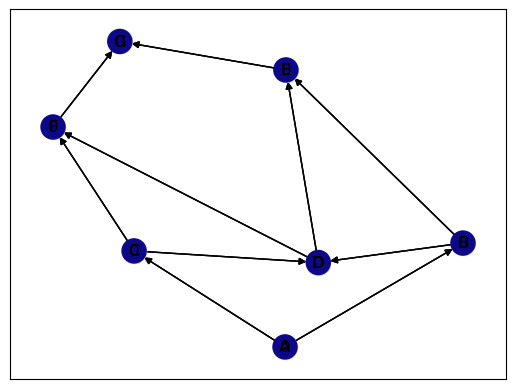

In [17]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_population_and_distance(graph, start_node, max_distance):
    population = {node: 0 for node in graph}  # Initialize with zero instead of -inf
    distance = {node: float('inf') for node in graph}
    distance[start_node] = 0
    
    queue = [(0, 0, [start_node])]
    
    while queue:
        current_pop, current_dist, current_path = heapq.heappop(queue)
        current_node = current_path[-1]
        
        # Condidtions section
        if current_dist > distance[current_node] or current_dist > max_distance:
            continue
        
        if current_pop > population[current_node]:
            continue
        
        for neighbor, edge_data in graph[current_node].items():
            edge_pop, edge_dist = edge_data['population'], edge_data['distance']
            new_pop = current_pop + edge_pop
            new_dist = current_dist + edge_dist

            if new_pop > population[neighbor] or new_dist > distance[neighbor]:
                print(graph[current_node][neighbor]['population'])
                continue
            
            population[neighbor] = new_pop
            distance[neighbor] = new_dist
            new_path = current_path + [neighbor]
            
            heapq.heappush(queue, (new_pop, new_dist, new_path))
    
    return population


# Example usage
graph = {
    'A': {'B': {'population': 100, 'distance': 5}, 'C': {'population': 200, 'distance': 10}},
    'B': {'D': {'population': 150, 'distance': 8}, 'E': {'population': 50, 'distance': 6}},
    'C': {'D': {'population': 100, 'distance': 7}, 'F': {'population': 300, 'distance': 12}},
    'D': {'E': {'population': 100, 'distance': 4}, 'F': {'population': 200, 'distance': 3}},
    'E': {'G': {'population': 200, 'distance': 9}},
    'F': {'G': {'population': 100, 'distance': 11}},
    'G': {}
}

start_node = 'A'
max_distance_threshold = 250

population_result = dijkstra_with_population_and_distance(graph, start_node, max_distance_threshold)
# print(population_result)
for node, pop in population_result.items():
    print(f"Population at node {node}: {pop}")

nx_graph = nx.DiGraph()

for node, edges in graph.items():
    for neighbor, edge_data in edges.items():
        nx_graph.add_edge(node, neighbor, weight=edge_data['distance'])

pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, pos, node_color='lightgray', with_labels=True)
nx.draw_networkx_edges(nx_graph, pos, edgelist=nx_graph.edges(), width=1, alpha=0.5)

# Highlight nodes based on population value
node_colors = [population_result[node] for node in nx_graph.nodes()]
node_labels = {node: pop for node, pop in population_result.items()}

nx.draw_networkx(nx_graph, pos, node_color=node_colors, cmap='plasma', with_labels=True)
nx.draw_networkx_labels(nx_graph, pos, labels=node_labels)

plt.show()


## K-shorest Paths

Path 1: ['A', 'B', 'D', 'E', 'G'], Summed Population: 550
Path 2: ['A', 'B', 'D', 'F', 'G'], Summed Population: 550
Path 3: ['A', 'C', 'D', 'E', 'G'], Summed Population: 600


KeyError: 'population'

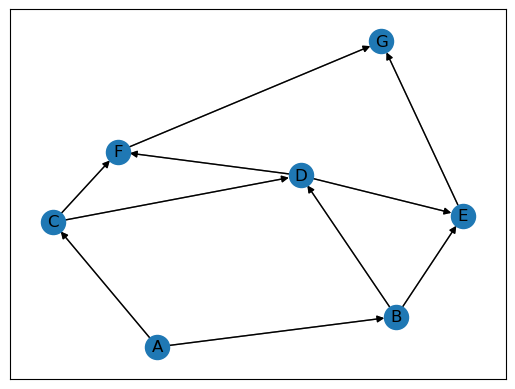

In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def k_shortest_paths_with_population(graph, start_node, num_paths):
    paths = []
    
    # Create a priority queue to store paths and their associated costs
    queue = [(0, [start_node])]
    
    while queue and len(paths) < num_paths:
        _, current_path = heapq.heappop(queue)  # Get the path with the minimum cost
        
        current_node = current_path[-1]
        
        # Check if the current path has exactly four nodes
        if len(current_path) == 5:
            paths.append(current_path)
        
        # Explore the neighbors of the current node
        for neighbor, edge_data in graph[current_node].items():
            new_path = current_path + [neighbor]  # Extend the current path
            
            # Check if the population of all nodes in the new path is non-zero
            if all(graph[u][v]['population'] != 0 for u, v in zip(new_path[:-1], new_path[1:])):
                heapq.heappush(queue, (0, new_path))  # Use 0 as cost since we are only considering four-node paths
    
    return paths


# Example usage
graph = {
    'A': {'B': {'population': 100}, 'C': {'population': 200}},
    'B': {'D': {'population': 150}, 'E': {'population': 0}},
    'C': {'D': {'population': 100}, 'F': {'population': 300}},
    'D': {'E': {'population': 100}, 'F': {'population': 200}},
    'E': {'G': {'population': 200}},
    'F': {'G': {'population': 100}},
    'G': {}
}

start_node = 'A'
num_paths = 3

paths_result = k_shortest_paths_with_population(graph, start_node, num_paths)

# Print the paths with their populations
for i, path in enumerate(paths_result):
    summed_pop = sum(graph[u][v]['population'] for u, v in zip(path[:-1], path[1:]))
    print(f"Path {i+1}: {path}, Summed Population: {summed_pop}")

nx_graph = nx.DiGraph(graph)

pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, pos, with_labels=True)
nx.draw_networkx_edges(nx_graph, pos, edgelist=nx_graph.edges(), width=1, alpha=0.5)

# Highlight nodes based on population value
node_colors = ['red' if graph[node]['population'] != 0 else 'lightgray' for node in nx_graph.nodes()]
node_labels = {node: graph[node]['population'] for node in nx_graph.nodes()}

for path in paths_result:
    nx.draw_networkx(nx_graph, pos, nodelist=path, node_color='green', edge_color='green', width=3, with_labels=True)

nx.draw_networkx(nx_graph, pos, node_color=node_colors, cmap='plasma', with_labels=True)
nx.draw_networkx_labels(nx_graph, pos, labels=node_labels)

plt.show()
